In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2023-03-14 21:25:19.974580: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 21:25:20.027600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 21:25:20.028789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 21:25:21.467009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/train/train-all.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'a': 0, 'b': 1, 'bad': 2, 'c': 3, 'd': 4, 'deaf': 5, 'e': 6, 'f': 7, 'fine': 8, 'g': 9, 'good': 10, 'goodbye': 11, 'h': 12, 'hello': 13, 'hungry': 14, 'i': 15, 'j': 16, 'k': 17, 'l': 18, 'm': 19, 'me': 20, 'n': 21, 'no': 22, 'o': 23, 'p': 24, 'please': 25, 'q': 26, 'r': 27, 's': 28, 'sorry': 29, 't': 30, 'thankyou': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'yes': 37, 'you': 38, 'z': 39}
(1200000, 11) (1200000, 40)
(8000, 150, 11) (8000, 150, 40)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6000, 150, 11) (2000, 150, 11)
(6000, 150, 40) (2000, 150, 40)


In [4]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

2023-03-14 21:27:47.903656: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 144000000 exceeds 10% of free system memory.


Epoch 1/20


2023-03-14 21:27:48.908581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:27:48.911300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:27:48.914002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

188/188 [==============================] - ETA: 0s - loss: 2.8177 - accuracy: 0.2686

2023-03-14 21:28:06.665637: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48000000 exceeds 10% of free system memory.
2023-03-14 21:28:07.136711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:28:07.141687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:28:07.143263: I tensorflow/core/common_runtime/executor.cc:1197] [/devi

188/188 [==============================] - 20s 89ms/step - loss: 2.8177 - accuracy: 0.2686 - val_loss: 2.1783 - val_accuracy: 0.4038
Epoch 2/20
188/188 [==============================] - 14s 73ms/step - loss: 1.8294 - accuracy: 0.5032 - val_loss: 1.5846 - val_accuracy: 0.5816
Epoch 3/20
188/188 [==============================] - 14s 73ms/step - loss: 1.4180 - accuracy: 0.6168 - val_loss: 1.2332 - val_accuracy: 0.6570
Epoch 4/20
188/188 [==============================] - 14s 73ms/step - loss: 1.1041 - accuracy: 0.6918 - val_loss: 1.0170 - val_accuracy: 0.7036
Epoch 5/20
188/188 [==============================] - 14s 73ms/step - loss: 0.9384 - accuracy: 0.7299 - val_loss: 0.8711 - val_accuracy: 0.7440
Epoch 6/20
188/188 [==============================] - 14s 75ms/step - loss: 0.8077 - accuracy: 0.7598 - val_loss: 0.8081 - val_accuracy: 0.7393
Epoch 7/20
188/188 [==============================] - 17s 89ms/step - loss: 0.7324 - accuracy: 0.7719 - val_loss: 0.7257 - val_accuracy: 0.7669
Epo

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 64)           19456     
                                                                 
 dense (Dense)               (None, 150, 40)           2600      
                                                                 
Total params: 22,056
Trainable params: 22,056
Non-trainable params: 0
_________________________________________________________________


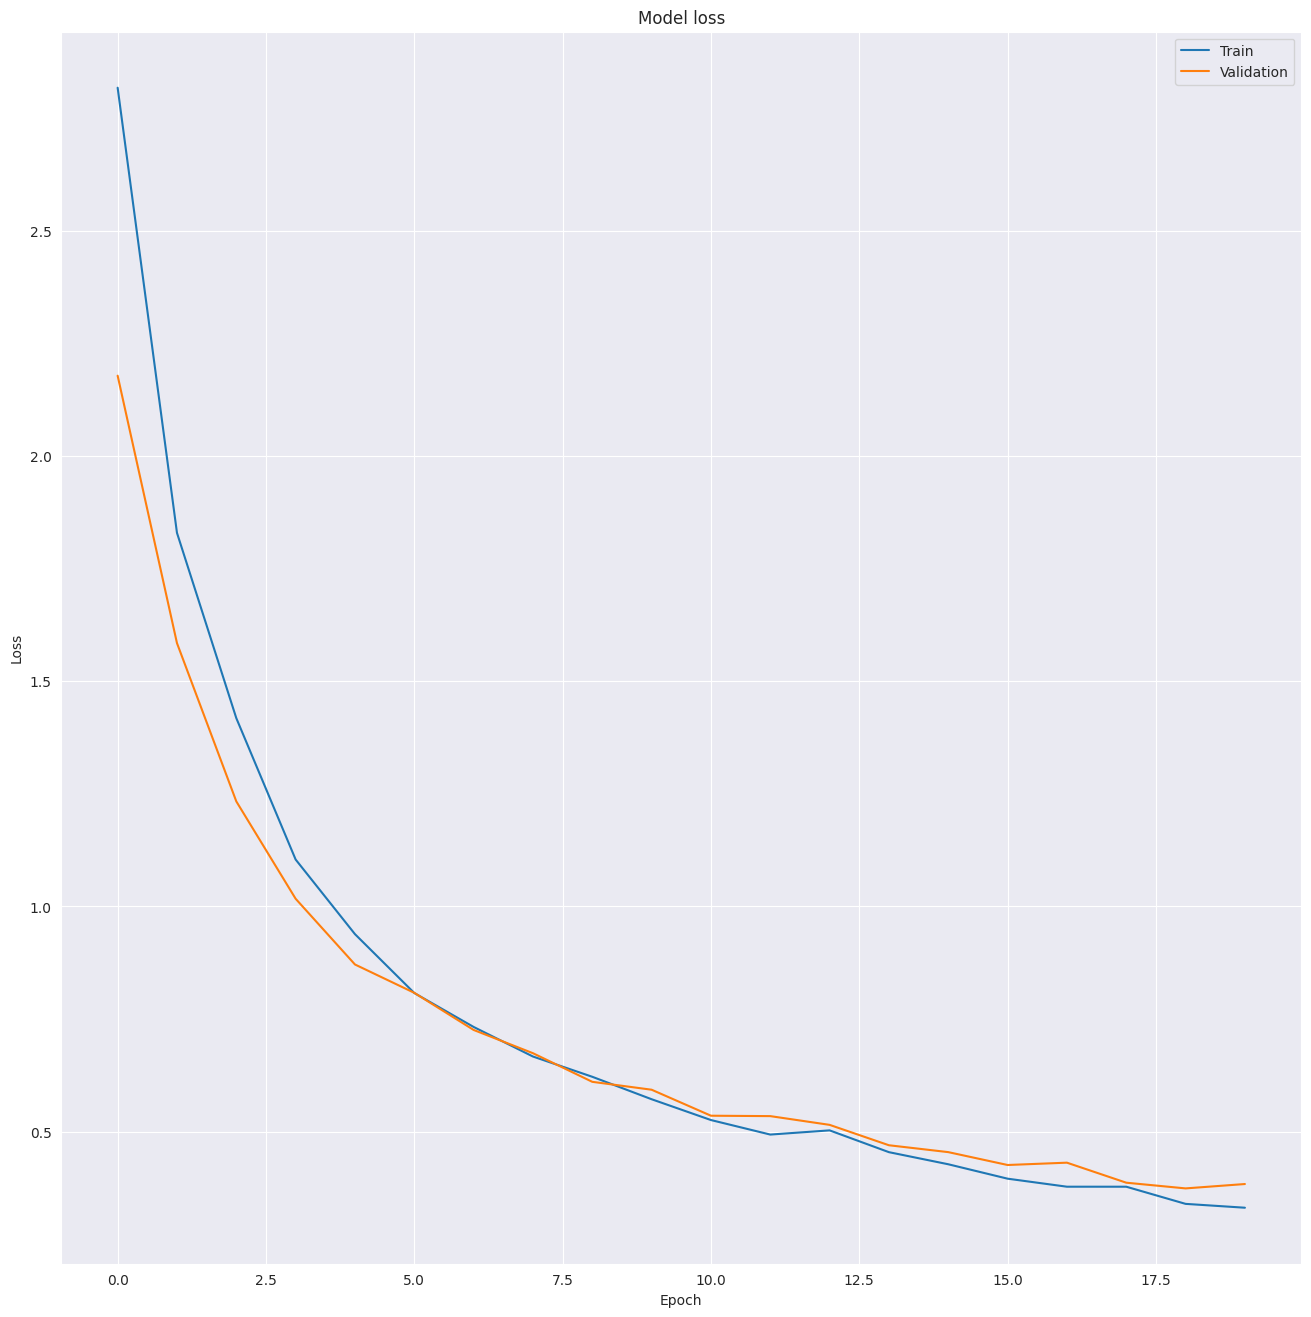

In [6]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

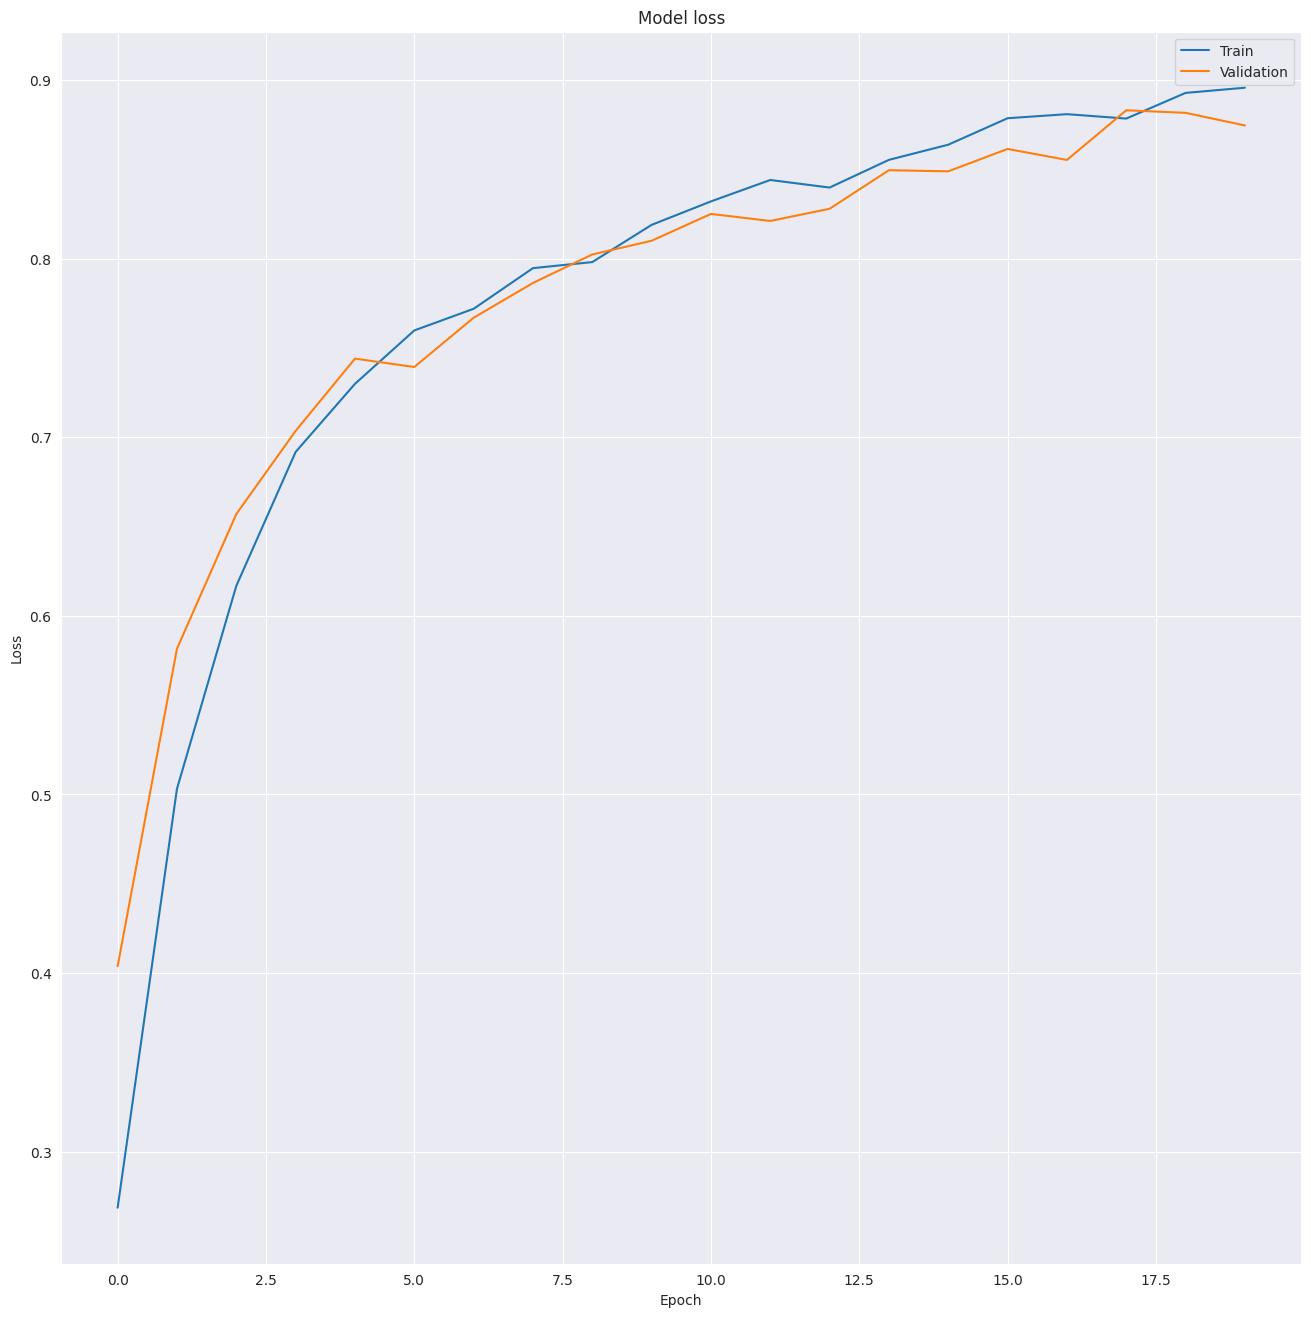

In [7]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
model.save('../models/all.h5')